In [1]:
import pandas as pd
import os
from ast import literal_eval
import sklearn.decomposition
import matplotlib.pyplot as plt
import numpy as np
import ast
import copy
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
DATA_DIR = './drive/MyDrive/(22-1)캡스톤/recomm/data/raw_data'

#1. Clustering

In [ ]:
solvedProblem_level = pd.read_csv(os.path.join(DATA_DIR, 'solvedProblem_level.csv'))
solvedProblem_level

,handle,count,problemIds,Counter,IdwithLevel,Counter_object,max_level,cluster
0,0000000000,633.0,"[4101, 10250, 16394, 20492, 20499, 16428, 1643...","[3, 3, 1, 1, 2, 2, 1, 2, 12, 4, 6, 3, 15, 7, 1...","[{4101: 3}, {10250: 3}, {16394: 1}, {20492: 1}...","{3: 103, 1: 72, 2: 78, 12: 15, 4: 58, 6: 40, 1...",24,5.0
1,0000064,130.0,"[2562, 1541, 4101, 1543, 1546, 2577, 2588, 106...","[4, 9, 3, 7, 5, 4, 2, 7, 2, 11, 4, 7, 7, 6, 3,...","[{2562: 4}, {1541: 9}, {4101: 3}, {1543: 7}, {...","{4: 21, 9: 5, 3: 24, 7: 10, 5: 8, 2: 15, 11: 3...",12,3.0
2,0000sb,9.0,"[15965, 1000, 1001, 1388, 15962, 15963, 15964,...","[9, 1, 1, 7, 1, 2, 1, 1, 11]","[{15965: 9}, {1000: 1}, {1001: 1}, {1388: 7}, ...","{9: 1, 1: 5, 7: 1, 2: 1, 11: 1}",11,3.0
3,0004poppop,126.0,"[2562, 1547, 11279, 2577, 1043, 2583, 2589, 10...","[4, 3, 9, 4, 12, 10, 11, 8, 10, 4, 11, 12, 11,...","[{2562: 4}, {1547: 3}, {11279: 9}, {2577: 4}, ...","{4: 6, 3: 15, 9: 8, 12: 11, 10: 14, 11: 15, 8:...",16,4.0
4,001,227.0,"[2562, 1018, 11779, 10757, 18436, 1546, 10250,...","[4, 6, 13, 1, 15, 5, 3, 1, 1, 1, 1, 4, 2, 1, 1...","[{2562: 4}, {1018: 6}, {11779: 13}, {10757: 1}...","{4: 19, 6: 18, 13: 3, 1: 71, 15: 12, 5: 9, 3: ...",20,5.0
...,...,...,...,...,...,...,...,...
59888,zzzzlll,6.0,"[1697, 2178, 7569, 2578, 7576, 1753]","[10, 10, 11, 6, 11, 11]","[{1697: 10}, {2178: 10}, {7569: 11}, {2578: 6}...","{10: 2, 11: 3, 6: 1}",11,3.0
59889,zzzzong123,3.0,"[1931, 10868, 1158]","[9, 15, 6]","[{1931: 9}, {10868: 15}, {1158: 6}]","{9: 1, 15: 1, 6: 1}",15,4.0
59890,zzzzz9887,27.0,"[2438, 2439, 11021, 11022, 9498, 2588, 1330, 2...","[3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 1, 1, 1, 4, 2, ...","[{2438: 3}, {2439: 3}, {11021: 3}, {11022: 3},...","{3: 10, 2: 6, 1: 10, 4: 1}",4,1.0
59891,zzzzzzzz,53.0,"[17413, 1158, 2438, 2439, 1929, 1546, 1292, 10...","[8, 6, 3, 3, 8, 5, 6, 6, 7, 3, 6, 11, 2, 8, 10...","[{17413: 8}, {1158: 6}, {2438: 3}, {2439: 3}, ...","{8: 9, 6: 5, 3: 8, 5: 3, 7: 5, 11: 2, 2: 4, 10...",15,4.0


In [ ]:
max(solvedProblem_level['cluster'])

5.0

In [ ]:
userLevel = pd.read_csv(os.path.join(DATA_DIR, 'userLevel.csv'))
userLevel

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,5.0,72.0,78.0,103.0,58.0,26.0,40.0,33.0,34.0,22.0,...,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,16.0,15.0,24.0,21.0,8.0,12.0,10.0,9.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,5.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,9.0,6.0,15.0,6.0,4.0,7.0,4.0,15.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,71.0,21.0,19.0,19.0,9.0,18.0,6.0,13.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59888,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59889,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59890,0.0,10.0,6.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59891,0.0,10.0,4.0,8.0,2.0,3.0,5.0,5.0,9.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
userLevel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59893 entries, 0 to 59892
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       59893 non-null  float64
 1   1       59893 non-null  float64
 2   2       59893 non-null  float64
 3   3       59893 non-null  float64
 4   4       59893 non-null  float64
 5   5       59893 non-null  float64
 6   6       59893 non-null  float64
 7   7       59893 non-null  float64
 8   8       59893 non-null  float64
 9   9       59893 non-null  float64
 10  10      59893 non-null  float64
 11  11      59893 non-null  float64
 12  12      59893 non-null  float64
 13  13      59893 non-null  float64
 14  14      59893 non-null  float64
 15  15      59893 non-null  float64
 16  16      59893 non-null  float64
 17  17      59893 non-null  float64
 18  18      59893 non-null  float64
 19  19      59893 non-null  float64
 20  20      59893 non-null  float64
 21  21      59893 non-null  float64
 22

In [ ]:
cluster1 = solvedProblem_level.index[solvedProblem_level['cluster']==1]
cluster2 = solvedProblem_level.index[solvedProblem_level['cluster']==2]
cluster3 = solvedProblem_level.index[solvedProblem_level['cluster']==3]
cluster4 = solvedProblem_level.index[solvedProblem_level['cluster']==4]
cluster5 = solvedProblem_level.index[solvedProblem_level['cluster']==5]

##1-1. PCA for displaying clusters

In [ ]:
userLevel_arr = userLevel.to_numpy()
userLevel_arr

array([[ 5., 72., 78., ...,  0.,  0.,  0.],
       [ 0., 16., 15., ...,  0.,  0.,  0.],
       [ 0.,  5.,  1., ...,  0.,  0.,  0.],
       ...,
       [ 0., 10.,  6., ...,  0.,  0.,  0.],
       [ 0., 10.,  4., ...,  0.,  0.,  0.],
       [ 0., 12.,  8., ...,  0.,  0.,  0.]])

In [ ]:
# normalize
#userLevel_arr = (userLevel_arr - np.min(userLevel_arr))/(np.max(userLevel_arr)-np.min(userLevel_arr))
for r in range(len(userLevel_arr)):
  userLevel_arr[r] = (userLevel_arr[r]-np.min(userLevel_arr[r]))/(np.max(userLevel_arr[r])-np.min(userLevel_arr[r]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


In [ ]:
userLevel_arr[np.isnan(userLevel_arr)] = 0

In [ ]:
# pca
pca  = sklearn.decomposition.PCA(n_components=3)
pca.fit(userLevel_arr)
pca_arr = pca.transform(userLevel_arr)

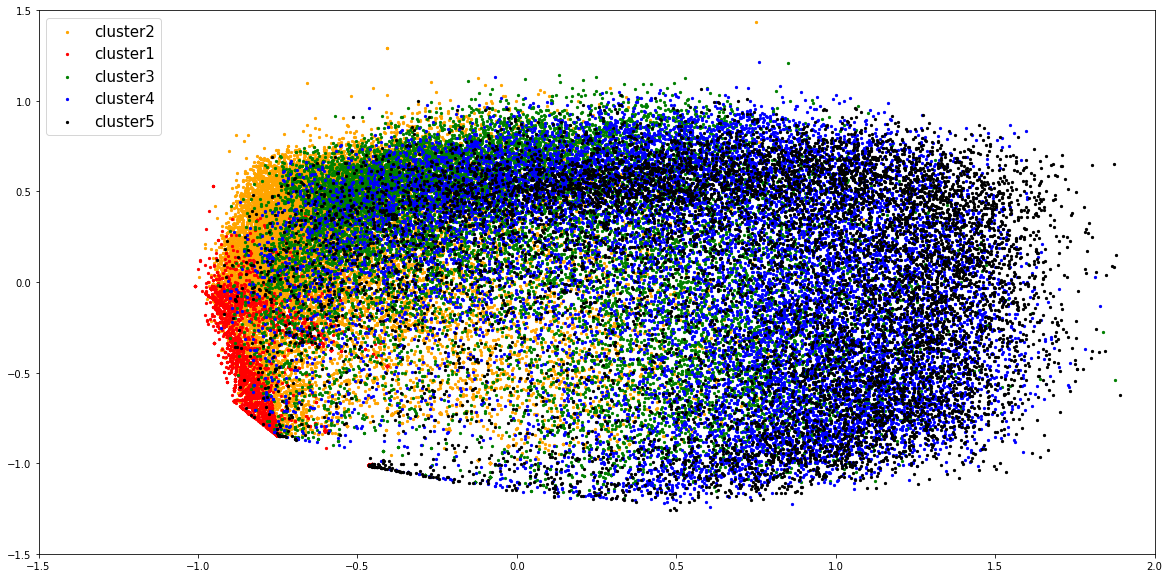

In [ ]:
plt.rcParams["figure.figsize"] = (20, 10)
plt.scatter(pca_arr[cluster2,0],pca_arr[cluster2,1], label="cluster2",s=5, c='orange')
plt.scatter(pca_arr[cluster1,0],pca_arr[cluster1,1], label="cluster1",s=5, c='red')
plt.scatter(pca_arr[cluster3,0],pca_arr[cluster3,1], label="cluster3", s=5, c='green')
plt.scatter(pca_arr[cluster4,0],pca_arr[cluster4,1], label="cluster4",s=5, c='blue')
plt.scatter(pca_arr[cluster5,0],pca_arr[cluster5,1], label="cluster5",s=5, c='black')

plt.legend(loc="upper left", fontsize=15)
plt.xlim([-1.5, 2.0])
plt.ylim([-1.5, 1.5])
plt.show()
#plt.savefig("image.png")

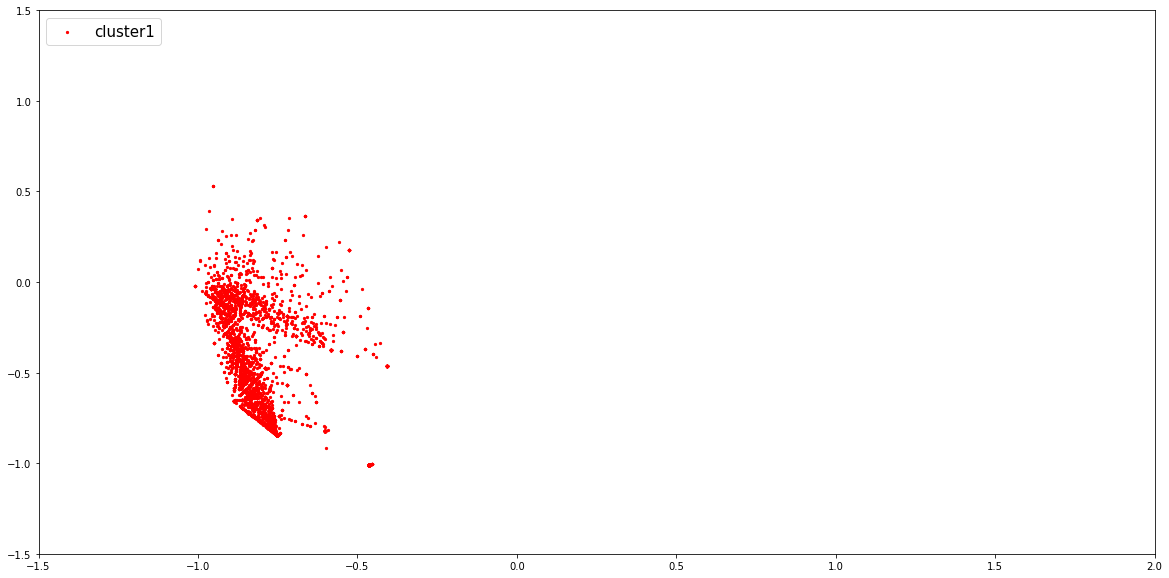

In [ ]:
plt.scatter(pca_arr[cluster1,0],pca_arr[cluster1,1], label="cluster1",s=5, c='red')
plt.xlim([-1.5, 2.0])
plt.ylim([-1.5, 1.5])
plt.legend(loc="upper left", fontsize=15)
plt.show()

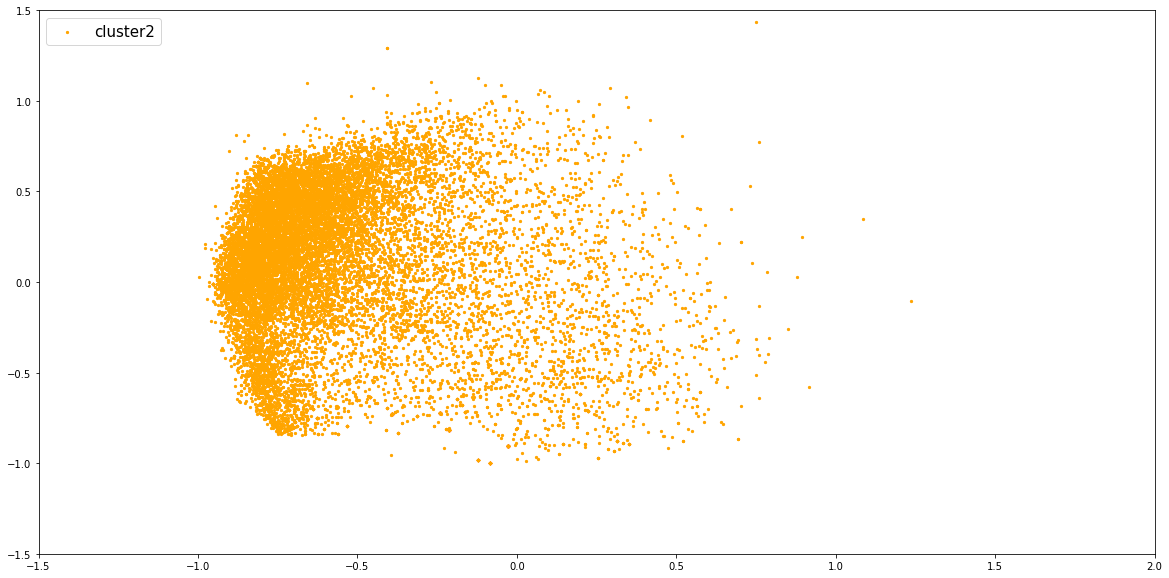

In [ ]:
plt.scatter(pca_arr[cluster2,0],pca_arr[cluster2,1], label="cluster2",s=5, c='orange')
plt.xlim([-1.5, 2.0])
plt.ylim([-1.5, 1.5])
plt.legend(loc="upper left", fontsize=15)
plt.show()

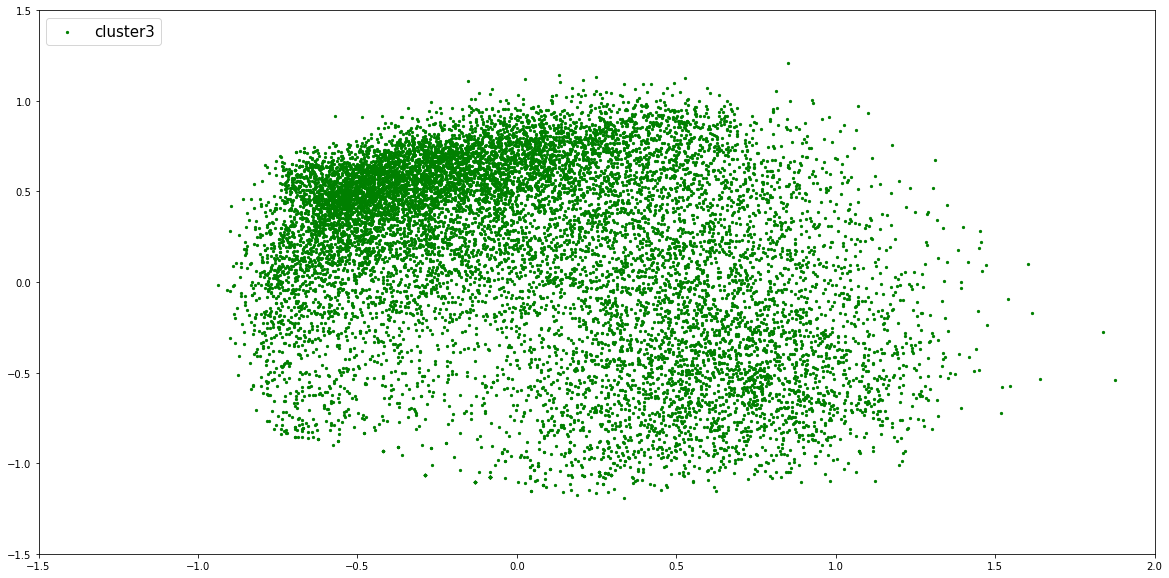

In [ ]:
plt.scatter(pca_arr[cluster3,0],pca_arr[cluster3,1], label="cluster3",s=5, c='green')
plt.xlim([-1.5, 2.0])
plt.ylim([-1.5, 1.5])
plt.legend(loc="upper left", fontsize=15)
plt.show()

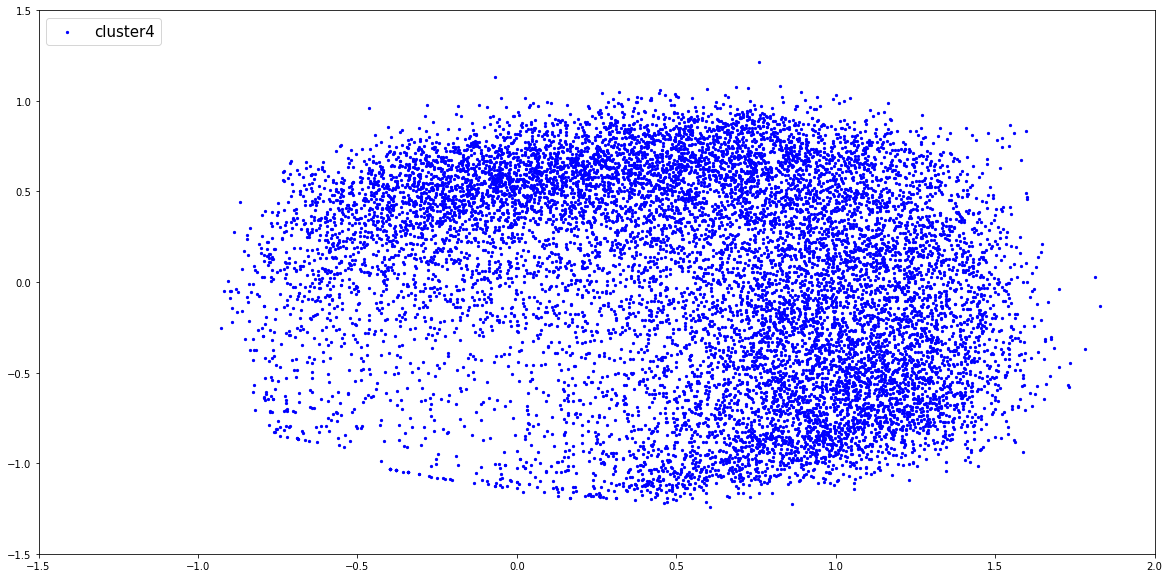

In [ ]:
plt.scatter(pca_arr[cluster4,0],pca_arr[cluster4,1], label="cluster4",s=5, c='blue')
plt.xlim([-1.5, 2.0])
plt.ylim([-1.5, 1.5])
plt.legend(loc="upper left", fontsize=15)
plt.show()

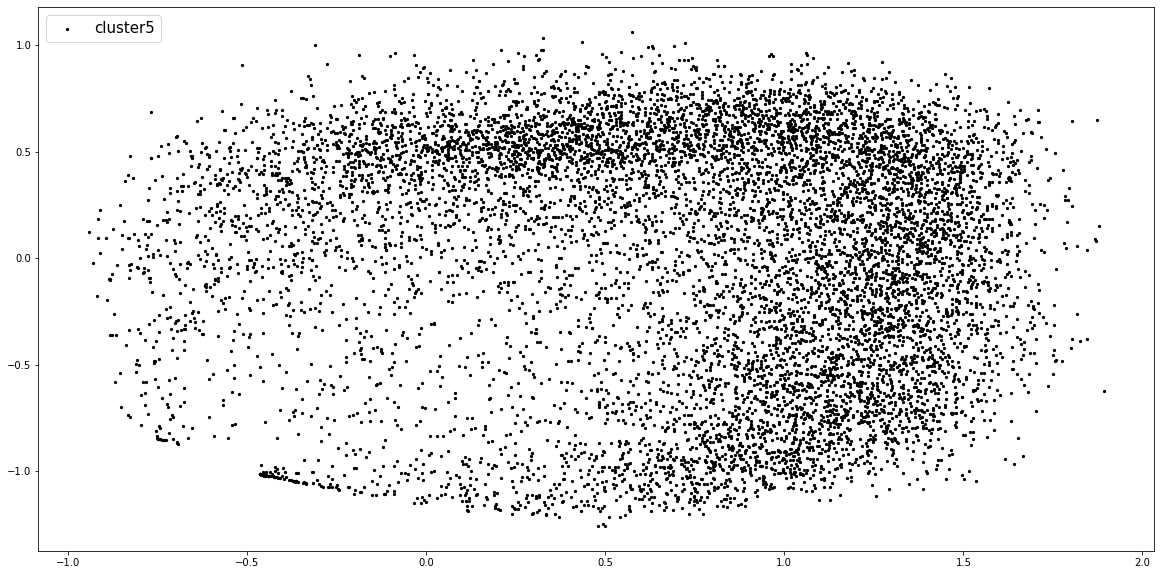

In [ ]:
plt.scatter(pca_arr[cluster5,0],pca_arr[cluster5,1], label="cluster5",s=5, c='black')
plt.legend(loc="upper left", fontsize=15)
plt.show()

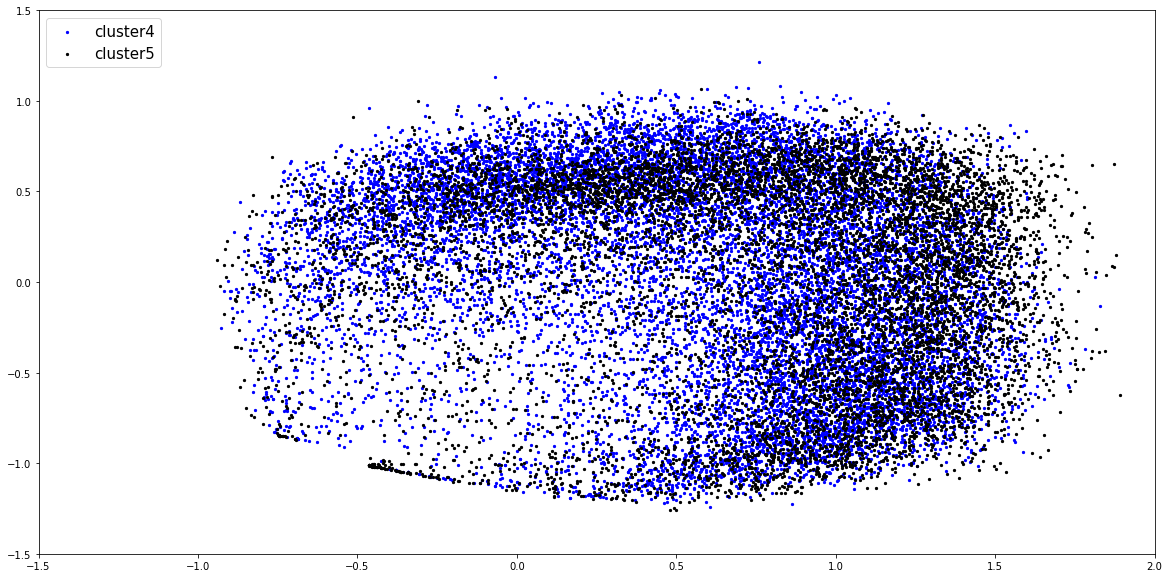

In [ ]:
plt.scatter(pca_arr[cluster4,0],pca_arr[cluster4,1], label="cluster4",s=5, c='blue')
plt.scatter(pca_arr[cluster5,0],pca_arr[cluster5,1], label="cluster5",s=5, c='black')
plt.xlim([-1.5, 2.0])
plt.ylim([-1.5, 1.5])
plt.legend(loc="upper left", fontsize=15)
plt.show()

#2. Data Split

- 누적 데이터
- cluster 5: for cluster 5, 9887개
- cluster 4 + cluster 5: for cluster 4, 22709개
- cluster 3 + cluster 4: for cluster 3, 25974 개
- cluster 2 + cluster 3: for cluster 2, 29960 개
- cluster 1 + cluster 2: for cluster 1, 24032 개


- 1개의 물리적 모델, 5개의 논리적 모델

In [5]:
problemMeta = pd.read_csv(os.path.join(DATA_DIR, 'problemMeta.csv'))
problemMeta

,Unnamed: 0,problemId,title,tags,acceptedUserCount,averageTries,level
0,0,1000,A+B,"['arithmetic', 'math', 'implementation']",168115,2.3543,1
1,1,1001,A-B,"['arithmetic', 'math', 'implementation']",140639,1.3922,1
2,2,1002,터렛,"['geometry', 'math']",24743,4.6195,7
3,3,1003,피보나치 함수,['dp'],33462,3.2071,8
4,4,1004,어린 왕자,['geometry'],8248,2.3484,8
...,...,...,...,...,...,...,...
22763,22763,24826,Reconstructing Tape Art,[],0,0.0000,0
22764,22764,24827,Jack The Lumberjack,[],0,0.0000,0
22765,22765,24828,Random Digital Exponentiation,"['bruteforcing', 'number_theory', 'backtrackin...",3,2.3333,11
22766,22766,24829,Counting Codes,[],0,0.0000,0


In [6]:
solvedProblem_level = pd.read_csv(os.path.join(DATA_DIR, 'solvedProblem_level.csv'))
solvedProblem_level

,handle,count,problemIds,Counter,IdwithLevel,Counter_object,max_level,cluster
0,0000000000,633.0,"[4101, 10250, 16394, 20492, 20499, 16428, 1643...","[3, 3, 1, 1, 2, 2, 1, 2, 12, 4, 6, 3, 15, 7, 1...","[{4101: 3}, {10250: 3}, {16394: 1}, {20492: 1}...","{3: 103, 1: 72, 2: 78, 12: 15, 4: 58, 6: 40, 1...",24,5.0
1,0000064,130.0,"[2562, 1541, 4101, 1543, 1546, 2577, 2588, 106...","[4, 9, 3, 7, 5, 4, 2, 7, 2, 11, 4, 7, 7, 6, 3,...","[{2562: 4}, {1541: 9}, {4101: 3}, {1543: 7}, {...","{4: 21, 9: 5, 3: 24, 7: 10, 5: 8, 2: 15, 11: 3...",12,3.0
2,0000sb,9.0,"[15965, 1000, 1001, 1388, 15962, 15963, 15964,...","[9, 1, 1, 7, 1, 2, 1, 1, 11]","[{15965: 9}, {1000: 1}, {1001: 1}, {1388: 7}, ...","{9: 1, 1: 5, 7: 1, 2: 1, 11: 1}",11,3.0
3,0004poppop,126.0,"[2562, 1547, 11279, 2577, 1043, 2583, 2589, 10...","[4, 3, 9, 4, 12, 10, 11, 8, 10, 4, 11, 12, 11,...","[{2562: 4}, {1547: 3}, {11279: 9}, {2577: 4}, ...","{4: 6, 3: 15, 9: 8, 12: 11, 10: 14, 11: 15, 8:...",16,4.0
4,001,227.0,"[2562, 1018, 11779, 10757, 18436, 1546, 10250,...","[4, 6, 13, 1, 15, 5, 3, 1, 1, 1, 1, 4, 2, 1, 1...","[{2562: 4}, {1018: 6}, {11779: 13}, {10757: 1}...","{4: 19, 6: 18, 13: 3, 1: 71, 15: 12, 5: 9, 3: ...",20,5.0
...,...,...,...,...,...,...,...,...
59888,zzzzlll,6.0,"[1697, 2178, 7569, 2578, 7576, 1753]","[10, 10, 11, 6, 11, 11]","[{1697: 10}, {2178: 10}, {7569: 11}, {2578: 6}...","{10: 2, 11: 3, 6: 1}",11,3.0
59889,zzzzong123,3.0,"[1931, 10868, 1158]","[9, 15, 6]","[{1931: 9}, {10868: 15}, {1158: 6}]","{9: 1, 15: 1, 6: 1}",15,4.0
59890,zzzzz9887,27.0,"[2438, 2439, 11021, 11022, 9498, 2588, 1330, 2...","[3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 1, 1, 1, 4, 2, ...","[{2438: 3}, {2439: 3}, {11021: 3}, {11022: 3},...","{3: 10, 2: 6, 1: 10, 4: 1}",4,1.0
59891,zzzzzzzz,53.0,"[17413, 1158, 2438, 2439, 1929, 1546, 1292, 10...","[8, 6, 3, 3, 8, 5, 6, 6, 7, 3, 6, 11, 2, 8, 10...","[{17413: 8}, {1158: 6}, {2438: 3}, {2439: 3}, ...","{8: 9, 6: 5, 3: 8, 5: 3, 7: 5, 11: 2, 2: 4, 10...",15,4.0


## file 분리

In [7]:
cluster1 = solvedProblem_level.index[solvedProblem_level['cluster']==1]
cluster2 = solvedProblem_level.index[solvedProblem_level['cluster']==2]
cluster3 = solvedProblem_level.index[solvedProblem_level['cluster']==3]
cluster4 = solvedProblem_level.index[solvedProblem_level['cluster']==4]
cluster5 = solvedProblem_level.index[solvedProblem_level['cluster']==5]

In [8]:
data1 = solvedProblem_level.iloc[cluster1]
data2 = solvedProblem_level.iloc[cluster2]
data3 = solvedProblem_level.iloc[cluster3]
data4 = solvedProblem_level.iloc[cluster4]
data5 = solvedProblem_level.iloc[cluster5]

## Sparsity 계산 

In [ ]:
def calculate_sparsity(dataframe):
  dataframe = dataframe[['handle', 'problemIds', 'count']]
  dataframe['problemIds'] = dataframe['problemIds'].apply(lambda x: ast.literal_eval(x))
  user_no = len(dataframe)
  
  counts = np.sum(dataframe['count'])

  problems = []
  for i in range(len(dataframe)):
     problems = problems + dataframe.iloc[i,1]
  problems_no = len(set(problems))
  
  sparsity = 1-(1. * counts / (user_no * problems_no))
  return sparsity

In [11]:
print("data1 sparsity: ", calculate_sparsity(data1))
print("data2 sparsity: ", calculate_sparsity(data2)) 
print("data3 sparsity: ", calculate_sparsity(data3)) 
print("data4 sparsity: ", calculate_sparsity(data4)) 
print("data5 sparsity: ", calculate_sparsity(data5)) 

data1 sparsity:  0.9860188261351052


KeyboardInterrupt: ignored

## 2.1 train, validation, test split

In [12]:
def sort_by_level(dataframe):
  dataframe['IdwithLevel'].apply(lambda x: x.sort(key=lambda y: list(y.values())[0]))
  dataframe = dataframe[['handle', 'IdwithLevel', 'max_level', 'cluster']]
  return dataframe

In [13]:
data1['IdwithLevel'] = data1['IdwithLevel'].apply(lambda x: ast.literal_eval(x))
data2['IdwithLevel'] = data2['IdwithLevel'].apply(lambda x: ast.literal_eval(x))
data3['IdwithLevel'] = data3['IdwithLevel'].apply(lambda x: ast.literal_eval(x))
data4['IdwithLevel'] = data4['IdwithLevel'].apply(lambda x: ast.literal_eval(x))
data5['IdwithLevel'] = data5['IdwithLevel'].apply(lambda x: ast.literal_eval(x))

In [14]:
data1_sorted = sort_by_level(pd.concat([data1,data2]))
data2_sorted = sort_by_level(pd.concat([data2,data3]))
data3_sorted = sort_by_level(pd.concat([data3,data4]))
data4_sorted = sort_by_level(pd.concat([data4,data5]))
data5_sorted = sort_by_level(data5)

In [15]:
data1_sorted = data1_sorted.rename(columns = {'IdwithLevel':'problemId'})
data2_sorted = data2_sorted.rename(columns = {'IdwithLevel':'problemId'})
data3_sorted = data3_sorted.rename(columns = {'IdwithLevel':'problemId'})
data4_sorted = data4_sorted.rename(columns = {'IdwithLevel':'problemId'})
data5_sorted = data5_sorted.rename(columns = {'IdwithLevel':'problemId'})

In [16]:
data1_sorted

,handle,problemId,max_level,cluster
12,00_jw,"[{1000: 1}, {1001: 1}, {2557: 1}, {10718: 1}]",1,1.0
21,00skgun,"[{2557: 1}, {10718: 1}]",1,1.0
28,010724pjh,"[{11654: 1}, {2475: 1}, {10171: 1}, {10172: 1}...",3,1.0
31,0114ajs00,"[{1000: 1}, {1001: 1}, {1008: 2}]",2,1.0
32,0114kek,[],-1,1.0
...,...,...,...,...
59867,zzz36963,"[{11654: 1}, {10172: 1}, {10430: 1}, {8393: 1}...",7,2.0
59872,zzzaq1004,"[{10171: 1}, {10172: 1}, {10430: 1}, {8393: 1}...",8,2.0
59875,zzziu,"[{10171: 1}, {10430: 1}, {10718: 1}, {1000: 1}...",5,2.0
59879,zzzmmmxn,"[{10757: 1}, {16394: 1}, {1550: 1}, {20492: 1}...",8,2.0


In [17]:
def userInfo(dataframe, cluster_no):
  new_df = dataframe[['handle', 'max_level']]
  new_df = new_df.reset_index(drop=True)
  new_df = new_df.reset_index(drop=False)
  return new_df

In [18]:
d1_users = userInfo(data1_sorted, 1)
d2_users = userInfo(data2_sorted, 2)
d3_users = userInfo(data3_sorted, 3)
d4_users = userInfo(data4_sorted, 4)
d5_users = userInfo(data5_sorted, 5)

In [19]:
# problem info
def probleminfo(data, cluster_no):
  data_exploded = data.explode('problemId')
  data_exploded = data_exploded.dropna(axis=0)
  problem = data
  problem = data_exploded['problemId'].apply(lambda x: [i for i in x.keys()][0])
  problem = list(set(problem))
  problems = pd.DataFrame({'problemId':sorted(problem)})
  problems = pd.merge(problems, problemMeta, left_on='problemId', right_on='problemId', how='inner')
  problems = problems[['problemId', 'level']]
  problems = problems.reset_index(drop=False)
  problems['cluster'] = cluster_no
  return problems

In [20]:
d1_problems = probleminfo(data1_sorted,1)
d2_problems = probleminfo(data2_sorted,2)
d3_problems = probleminfo(data3_sorted,3)
d4_problems = probleminfo(data4_sorted,4)
d5_problems = probleminfo(data5_sorted,5)

In [21]:
data1_sorted['problemId'] = data1_sorted['problemId'].apply(lambda prob_basket: [[i for i in prob.keys()][0] for prob in prob_basket])
data2_sorted['problemId'] = data2_sorted['problemId'].apply(lambda prob_basket: [[i for i in prob.keys()][0] for prob in prob_basket])
data3_sorted['problemId'] = data3_sorted['problemId'].apply(lambda prob_basket: [[i for i in prob.keys()][0] for prob in prob_basket])
data4_sorted['problemId'] = data4_sorted['problemId'].apply(lambda prob_basket: [[i for i in prob.keys()][0] for prob in prob_basket])
data5_sorted['problemId'] = data5_sorted['problemId'].apply(lambda prob_basket: [[i for i in prob.keys()][0] for prob in prob_basket])

In [22]:
def dataset_split(data, seed):
  train = data.sample(frac=0.8, random_state=seed)
  valid = data.sample(frac=0.1, random_state=seed)
  test = data.sample(frac=0.1, random_state=seed)
  return train, valid, test

In [23]:
d1_train, d1_validation, d1_test = dataset_split(data1_sorted, 1000)
d2_train, d2_validation, d2_test = dataset_split(data2_sorted, 1000)
d3_train, d3_validation, d3_test = dataset_split(data3_sorted, 1000)
d4_train, d4_validation, d4_test = dataset_split(data4_sorted, 1000)
d5_train, d5_validation, d5_test = dataset_split(data5_sorted, 1000)

## 2-2. 데이터 filtering
- train data에 해당

In [24]:
def filtering(dataframe, min_limit):
  if min_limit > 0:
    dataframe = dataframe[dataframe['problemId'].apply(lambda x: len(x)) >= min_limit]
  return dataframe

In [25]:
d1_train_filtered = filtering(d1_train, 15)
d2_train_filtered = filtering(d2_train, 15)
d3_train_filtered = filtering(d3_train, 15)
d4_train_filtered = filtering(d4_train, 15)
d5_train_filtered = filtering(d5_train, 15)

## 2.3 validation, test X, y split
- 난이도로 오름차순 정렬되어 있는 IdwithLevel의 array
- 특정 위치 이상의 값들 중에서 랜덤하게 선택
  - (전체 array 길이* 0.7) 이상의 값들 중에서 (전체 array 길이 * 0.2)개 선택
  - 전체 array 길이가 15 이하인 경우 X로 몰빵

In [26]:
def split_Xy(dataframe, LIMIT, SIZE, seed):
  df_len = dataframe['problemId'].apply(lambda x: len(x))
  pivot = (df_len - 1 - np.ceil(df_len * LIMIT)).astype(np.int64)
  size = np.ceil(df_len * SIZE).astype(np.int64)
  np.random.seed(seed)

  X = dataframe.copy(deep=True)
  y = dataframe.copy(deep=True)
  
  for i in range(len(dataframe)):
    X_entry = copy.deepcopy(dataframe.iloc[i,1])
    if df_len.iloc[i] > 15:
      idxlist = set(np.sort(np.random.randint(low=pivot.iloc[i], high=df_len.iloc[i], size=size.iloc[i])))
      y_entry = [X_entry[idx] for idx in idxlist]
      for y_tmp in y_entry:
        X_entry.remove(y_tmp)
    else:
      y_entry = []
    X.iloc[i,1] = str(X_entry)
    y.iloc[i,1] = str(y_entry)

  X['problemId'] = X['problemId'].apply(lambda x: ast.literal_eval(x))
  y['problemId'] = y['problemId'].apply(lambda x: ast.literal_eval(x))
  X = X[['handle', 'problemId']]
  y = y[['handle', 'problemId']]
  return X, y

In [27]:
d1_validation_X, d1_validation_y = split_Xy(d1_validation, 0.7, 0.3, 4)
d1_test_X, d1_test_y = split_Xy(d1_test, 0.7, 0.3, 4)

d2_validation_X, d2_validation_y = split_Xy(d2_validation, 0.7, 0.3, 4)
d2_test_X, d2_test_y = split_Xy(d2_test, 0.7, 0.3, 4)

d3_validation_X, d3_validation_y = split_Xy(d3_validation, 0.7, 0.3, 4)
d3_test_X, d3_test_y = split_Xy(d3_test, 0.7, 0.3, 4)

d4_validation_X, d4_validation_y = split_Xy(d4_validation, 0.7, 0.3, 4)
d4_test_X, d4_test_y = split_Xy(d4_test, 0.7, 0.3, 4)

d5_validation_X, d5_validation_y = split_Xy(d5_validation, 0.7, 0.3, 4)
d5_test_X, d5_test_y = split_Xy(d5_test, 0.7, 0.3, 4)

## 2.4 explode

In [28]:
def explode(dataframe):
  dataframe = dataframe[['handle', 'problemId']]
  dataframe = dataframe.reset_index(drop=True)
  dataframe = dataframe.explode('problemId')
  dataframe = dataframe.dropna(axis=0)
  return dataframe

In [29]:
d1_train = explode(d1_train_filtered)
d2_train = explode(d2_train_filtered)
d3_train = explode(d3_train_filtered)
d4_train = explode(d4_train_filtered)
d5_train = explode(d5_train_filtered)

d1_validation_X= explode(d1_validation_X)
d2_validation_X = explode(d2_validation_X)
d3_validation_X = explode(d3_validation_X)
d4_validation_X = explode(d4_validation_X)
d5_validation_X = explode(d5_validation_X)

d1_test_X= explode(d1_test_X)
d2_test_X = explode(d2_test_X)
d3_test_X = explode(d3_test_X)
d4_test_X = explode(d4_test_X)
d5_test_X = explode(d5_test_X)

##2.5 클러스터 정보 저장 

In [30]:
# cluster 정보 저장
cluster = [4,10,13,16,30] # cluster 1은 4 이하, cluster 2는 5이상 10이하 ...
cluster = pd.DataFrame({'level':cluster})
cluster

,level
0,4
1,10
2,13
3,16
4,30


In [31]:
DIR = './drive/MyDrive/(22-1)캡스톤/recomm/data/preprocessed/'
cluster.to_csv(os.path.join(DIR, 'clusterinfo.csv'), index=False)

In [33]:
total_user = solvedProblem_level[['handle', 'problemIds', 'max_level', 'cluster']]
total_user

,handle,problemIds,max_level,cluster
0,0000000000,"[4101, 10250, 16394, 20492, 20499, 16428, 1643...",24,5.0
1,0000064,"[2562, 1541, 4101, 1543, 1546, 2577, 2588, 106...",12,3.0
2,0000sb,"[15965, 1000, 1001, 1388, 15962, 15963, 15964,...",11,3.0
3,0004poppop,"[2562, 1547, 11279, 2577, 1043, 2583, 2589, 10...",16,4.0
4,001,"[2562, 1018, 11779, 10757, 18436, 1546, 10250,...",20,5.0
...,...,...,...,...
59888,zzzzlll,"[1697, 2178, 7569, 2578, 7576, 1753]",11,3.0
59889,zzzzong123,"[1931, 10868, 1158]",15,4.0
59890,zzzzz9887,"[2438, 2439, 11021, 11022, 9498, 2588, 1330, 2...",4,1.0
59891,zzzzzzzz,"[17413, 1158, 2438, 2439, 1929, 1546, 1292, 10...",15,4.0


In [34]:
total_user.to_csv(os.path.join(DIR, 'total_user_info.csv'), index=False)

## 2.6 데이터 세트 저장

In [35]:
def save_dataset(dataframe, DIR, name):
  dataframe.to_csv(os.path.join(DIR, name), index=False)

In [36]:
DIR = './drive/MyDrive/(22-1)캡스톤/recomm/data/preprocessed/data'

In [37]:
save_dataset(d1_train, DIR+'1', 'd1_train.csv')
save_dataset(d1_users, DIR+'1', 'd1_users.csv')
save_dataset(d1_problems, DIR+'1', 'd1_problems.csv')
save_dataset(d1_validation_X, DIR+'1', 'd1_validation_X.csv')
save_dataset(d1_validation_y, DIR+'1', 'd1_validation_y.csv')
save_dataset(d1_test_X, DIR+'1', 'd1_test_X.csv')
save_dataset(d1_test_y, DIR+'1', 'd1_test_y.csv')

In [38]:
save_dataset(d2_train, DIR+'2', 'd2_train.csv')
save_dataset(d2_users, DIR+'2', 'd2_users.csv')
save_dataset(d2_problems, DIR+'2', 'd2_problems.csv')
save_dataset(d2_validation_X, DIR+'2', 'd2_validation_X.csv')
save_dataset(d2_validation_y, DIR+'2', 'd2_validation_y.csv')
save_dataset(d2_test_X, DIR+'2', 'd2_test_X.csv')
save_dataset(d2_test_y, DIR+'2', 'd2_test_y.csv')

In [39]:
save_dataset(d3_train, DIR+'3', 'd3_train.csv')
save_dataset(d3_users, DIR+'3', 'd3_users.csv')
save_dataset(d3_problems, DIR+'3', 'd3_problems.csv')
save_dataset(d3_validation_X, DIR+'3', 'd3_validation_X.csv')
save_dataset(d3_validation_y, DIR+'3', 'd3_validation_y.csv')
save_dataset(d3_test_X, DIR+'3', 'd3_test_X.csv')
save_dataset(d3_test_y, DIR+'3', 'd3_test_y.csv')

In [40]:
save_dataset(d4_train, DIR+'4', 'd4_train.csv')
save_dataset(d4_users, DIR+'4', 'd4_users.csv')
save_dataset(d4_problems, DIR+'4', 'd4_problems.csv')
save_dataset(d4_validation_X, DIR+'4', 'd4_validation_X.csv')
save_dataset(d4_validation_y, DIR+'4', 'd4_validation_y.csv')
save_dataset(d4_test_X, DIR+'4', 'd4_test_X.csv')
save_dataset(d4_test_y, DIR+'4', 'd4_test_y.csv')

In [41]:
save_dataset(d5_train, DIR+'5', 'd5_train.csv')
save_dataset(d5_users, DIR+'5', 'd5_users.csv')
save_dataset(d5_problems, DIR+'5', 'd5_problems.csv')
save_dataset(d5_validation_X, DIR+'5', 'd5_validation_X.csv')
save_dataset(d5_validation_y, DIR+'5', 'd5_validation_y.csv')
save_dataset(d5_test_X, DIR+'5', 'd5_test_X.csv')
save_dataset(d5_test_y, DIR+'5', 'd5_test_y.csv')